In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# Models
from sklearn import svm 
from sklearn import tree
from sklearn import linear_model

In [2]:
#Import CSV and get labels and data
train_set = pd.read_csv('./train.csv')
label_set = train_set['label']
train_set = train_set.drop('label', axis = 1)

In [3]:
# Check size of dataset imported
label_set.size

42000

In [4]:
# Prints a sample, code from Instructions
def printIndex(sample):
    sample=sample.values.reshape((28,28))
    plt.imshow(sample,cmap='gray')
    plt.show()

In [5]:
# Set up models with params and frames to save scores in.
data_set_sizes = [625, 1250, 6250, 12500, 25000]
# poly kernel has better results than linear
svm_model = svm.SVC(kernel = 'poly', decision_function_shape = 'ovo')
tree_model = tree.DecisionTreeClassifier()
lr_model = linear_model.LogisticRegression()
svm_scores = []
tree_scores = []
lr_scores = []

# Supress futurewarnings from output
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)

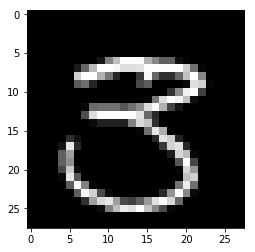

Predicted:  9


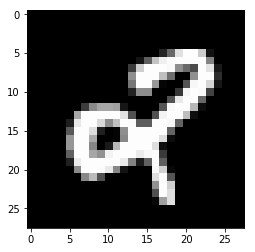

Predicted:  4


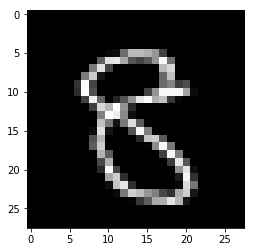

Predicted:  4


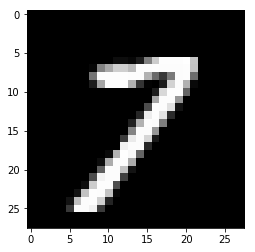

Predicted:  9


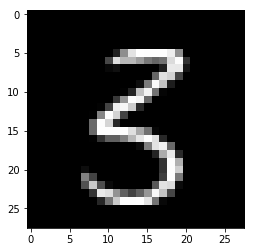

Predicted:  5


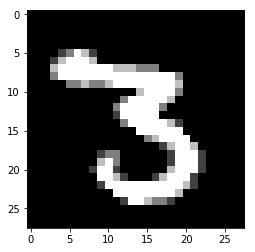

Predicted:  2


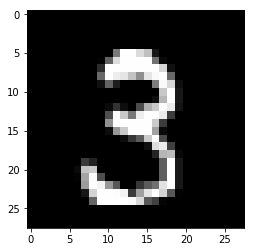

Predicted:  9
Accuracy:  0.72


In [6]:
# Print smaller dataset to check which are being predicted incorrectly
set_X = train_set.iloc[0:125]
set_Y = label_set.iloc[0:125]
X_train, X_test, y_train, y_test = train_test_split(set_X, set_Y, test_size=0.2, random_state=21)
# Fit all models
svm_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)
# Predict 
svm_pred = svm_model.predict(X_test)
tree_pred = tree_model.predict(X_test)
lr_pred = lr_model.predict(X_test)


for x in range(0, 24):
    if(lr_pred[x] != y_test.iloc[x]):
        printIndex(X_test.iloc[x])
        print("Predicted: ", lr_pred[x])

print("Accuracy: ", accuracy_score(y_test, lr_pred))

In [7]:
# Create data for multiple sizes
for size in data_set_sizes:
    print("Testing Models at Size:  ", size)
    # Get data by size and Split
    set_X = train_set.iloc[0:size]
    set_Y = label_set.iloc[0:size]
    X_train, X_test, y_train, y_test = train_test_split(set_X, set_Y, test_size=0.2, random_state=21)
    # Fit all models
    svm_model.fit(X_train, y_train)
    tree_model.fit(X_train, y_train)
    lr_model.fit(X_train, y_train)
    # Predict 
    svm_pred = svm_model.predict(X_test)
    tree_pred = tree_model.predict(X_test)
    lr_pred = lr_model.predict(X_test)
    # Save scores
    svm_scores.append(accuracy_score(y_test, svm_pred))
    tree_scores.append(accuracy_score(y_test, tree_pred))
    lr_scores.append(accuracy_score(y_test, lr_pred))
    print("SVM at size: ", size)
    print(classification_report(y_test, svm_pred))
    print("Accuracy: ", accuracy_score(y_test, svm_pred))
    print("Tree at size: ", size)
    print(classification_report(y_test, tree_pred))
    print("Accuracy: ", accuracy_score(y_test, tree_pred))
    print("Logistic Regression at size: ", size)
    print(classification_report(y_test, lr_pred))
    print("Accuracy: ", accuracy_score(y_test, lr_pred))

Testing Models at Size:   625
SVM at size:  625
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        17
           1       0.71      0.92      0.80        13
           2       1.00      0.69      0.82        13
           3       0.87      0.93      0.90        14
           4       0.75      0.75      0.75        12
           5       0.85      0.92      0.88        12
           6       0.91      0.77      0.83        13
           7       0.86      0.67      0.75         9
           8       0.57      0.57      0.57         7
           9       0.78      0.93      0.85        15

   micro avg       0.82      0.82      0.82       125
   macro avg       0.82      0.80      0.80       125
weighted avg       0.83      0.82      0.82       125

Accuracy:  0.816
Tree at size:  625
              precision    recall  f1-score   support

           0       0.86      0.71      0.77        17
           1       0.92      0.92      0.92     

/home/jimmy/.local/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


SVM at size:  6250
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       115
           1       0.94      0.98      0.96       132
           2       0.96      0.93      0.94       128
           3       0.98      0.92      0.95       130
           4       0.92      0.96      0.94       110
           5       0.94      0.94      0.94       112
           6       0.97      0.96      0.96       150
           7       0.98      0.95      0.96       131
           8       0.95      0.98      0.97       128
           9       0.93      0.92      0.93       114

   micro avg       0.95      0.95      0.95      1250
   macro avg       0.95      0.95      0.95      1250
weighted avg       0.95      0.95      0.95      1250

Accuracy:  0.952
Tree at size:  6250
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       115
           1       0.89      0.90      0.89       132
           2       0.7

/home/jimmy/.local/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


SVM at size:  12500
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       259
           1       0.96      0.99      0.98       270
           2       0.96      0.96      0.96       247
           3       0.98      0.93      0.95       247
           4       0.97      0.97      0.97       237
           5       0.95      0.95      0.95       239
           6       0.99      0.98      0.98       263
           7       0.95      0.93      0.94       238
           8       0.93      0.95      0.94       252
           9       0.95      0.94      0.94       248

   micro avg       0.96      0.96      0.96      2500
   macro avg       0.96      0.96      0.96      2500
weighted avg       0.96      0.96      0.96      2500

Accuracy:  0.9596
Tree at size:  12500
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       259
           1       0.91      0.93      0.92       270
           2       

/home/jimmy/.local/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


SVM at size:  25000
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       490
           1       0.97      0.99      0.98       543
           2       0.97      0.96      0.97       537
           3       0.96      0.96      0.96       541
           4       0.97      0.97      0.97       476
           5       0.94      0.95      0.95       459
           6       0.98      0.98      0.98       486
           7       0.97      0.98      0.97       523
           8       0.95      0.95      0.95       463
           9       0.95      0.94      0.95       482

   micro avg       0.97      0.97      0.97      5000
   macro avg       0.97      0.97      0.97      5000
weighted avg       0.97      0.97      0.97      5000

Accuracy:  0.9654
Tree at size:  25000
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       490
           1       0.91      0.92      0.92       543
           2       

In [8]:
# Test with full set

X_train, X_test, y_train, y_test = train_test_split(train_set, label_set, test_size=0.2, random_state=21)
# Fit all models
svm_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)
# Predict 
svm_pred = svm_model.predict(X_test)
tree_pred = tree_model.predict(X_test)
lr_pred = lr_model.predict(X_test)
# Save scores
svm_scores.append(accuracy_score(svm_pred, y_test))
tree_scores.append(accuracy_score(tree_pred, y_test))
lr_scores.append(accuracy_score(lr_pred, y_test))
print("SVM at size: ", size)
print(classification_report(svm_pred, y_test))
print("Tree at size: ", size)
print(classification_report(tree_pred, y_test))
print("Logistic Regression at size: ", size)
print(classification_report(lr_pred, y_test))

/home/jimmy/.local/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


SVM at size:  25000
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       823
           1       0.99      0.98      0.98       897
           2       0.98      0.97      0.98       805
           3       0.96      0.97      0.97       817
           4       0.96      0.98      0.97       817
           5       0.97      0.97      0.97       805
           6       0.99      0.98      0.98       891
           7       0.98      0.98      0.98       892
           8       0.97      0.97      0.97       804
           9       0.96      0.97      0.97       849

   micro avg       0.97      0.97      0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.98      0.97      0.98      8400

Tree at size:  25000
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       823
           1       0.96      0.94      0.95       914
           2       0.83      0.84    